# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [88]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import panel as pn
from panel.interact import interact
from panel import widgets
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
%matplotlib inline
pn.extension('plotly')
import hvplot.pandas

In [89]:
load_dotenv()

True

In [90]:
# Read the Mapbox API key
map_box_api = os.getenv("MAPBOX_API_KEY")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

## Load Data

In [91]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
housing_data = pd.read_csv(file_path, index_col="year")
housing_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

In [92]:
# Calculate the mean number of housing units per year  
housing_data_mean = housing_data.groupby('year')['housing_units'].mean()
housing_data_mean

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [93]:
#Calculate MAX Units
housing_max_price = max(housing_data_mean)
housing_max_price

384242

In [94]:
#Calculate MIN Units
housing_min_price = min(housing_data_mean)
housing_min_price

372560

In [95]:
#Calculate STD Units
housing_std = housing_data_mean.std()
housing_std

4206.0007132667015

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [96]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
housing_units_per_year = housing_data_mean.hvplot.bar(x="year", y="housing_units", rot=90).opts(
    yformatter="%.0f", title="Housing Units in San Fransisco from 2010 to 2016",
    ylim=(housing_min_price - housing_std, housing_max_price + housing_std)
)
housing_units_per_year

:Bars   [year]   (housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [97]:
# Calculate the average gross rent and average sale price per square foot
housing_data_aver_yr = housing_data.groupby('year')[['gross_rent', 'sale_price_sqr_foot']].mean()
housing_data_aver_yr

,gross_rent,sale_price_sqr_foot
year,,
2010,1239,369.344353
2011,1530,341.903429
2012,2324,399.389968
2013,2971,483.600304
2014,3528,556.277273
2015,3739,632.540352
2016,4390,697.643709


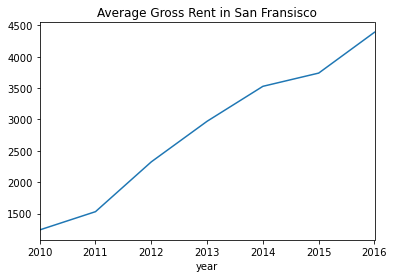

In [98]:
# Plot the Average Gross Rent per Year as a Line Chart 
average_gross_rent = housing_data_aver_yr['gross_rent'].plot(title='Average Gross Rent in San Fransisco')
plt.show()

### Average Sales Price per Year

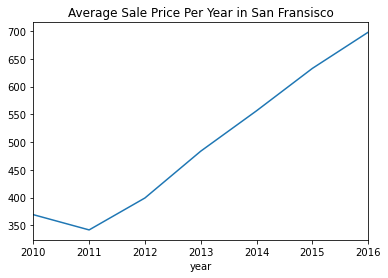

In [99]:
# Plot the Average Sales Price per Year as a line chart
average_sales_price = housing_data_aver_yr['sale_price_sqr_foot'].plot(title='Average Sale Price Per Year in San Fransisco')
plt.show()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [100]:
# Group by year and neighborhood and then create a new dataframe of the mean values
average_price_by_nb = housing_data.groupby(['year', 'neighborhood']).mean()
average_price_by_nb.tail()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2016 Telegraph Hill                   903.049771         384242        4390
     Twin Peaks                       970.085470         384242        4390
     Van Ness/ Civic Center           552.602567         384242        4390
     Visitacion Valley                328.319007         384242        4390
     Westwood Park                    631.195426         384242        4390

In [101]:
#Reset Index
average_price_by_nb.reset_index(inplace=True)

In [102]:
#Check Data
average_price_by_nb.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [103]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
average_price_by_neighborhood = average_price_by_nb.hvplot.line('year', 'sale_price_sqr_foot', groupby='neighborhood')
average_price_by_neighborhood

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [104]:
# Getting the data from the top 10 expensive neighborhoods
housing_data_high = housing_data.groupby('neighborhood').mean().sort_values("sale_price_sqr_foot", ascending=False)
housing_data_high.head(10)

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [105]:
# Plotting the data from the top 10 expensive neighborhoods
top_most_expensive_neighborhoods = housing_data_high['sale_price_sqr_foot'].iloc[0:10].hvplot(kind='bar').opts(frame_width=1000, frame_height=500, xlabel='Neighborhoods',  
ylabel='Sales Per SQ FT', title='Top 10 Most Expensive Neighborhoods in San Fransisco', ylim=(500, 1000))
top_most_expensive_neighborhoods

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [106]:
#Average Value Per Neighborhood
housing_data_year = housing_data.groupby('year').mean()
housing_data_year

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


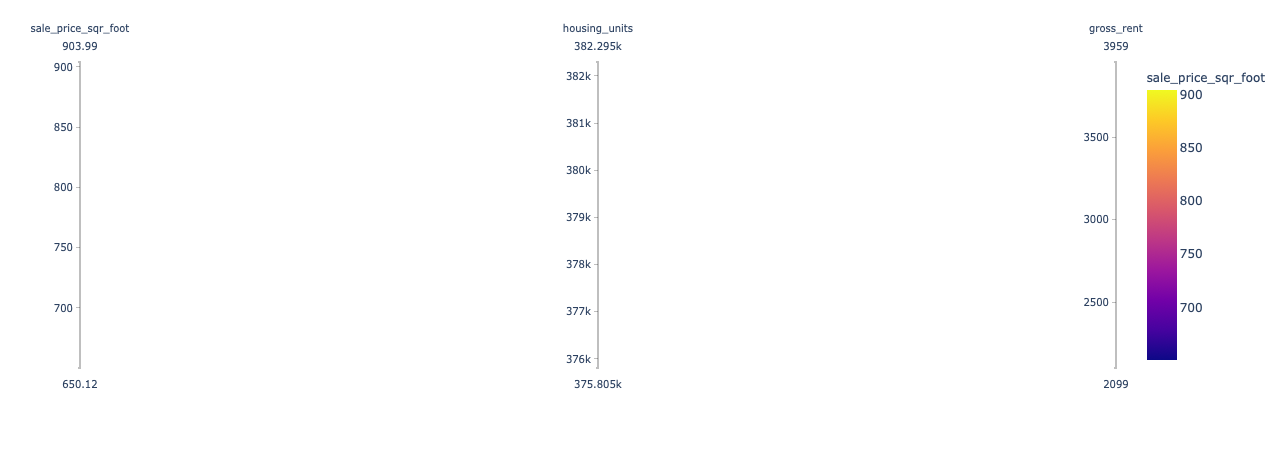

In [107]:
# Parallel Coordinates Plot
parallel_coordinates = px.parallel_coordinates(housing_data_high.iloc[:10], color='sale_price_sqr_foot')
parallel_coordinates

In [108]:
#Data Check
housing_data_high.head()

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000


In [109]:
#Reset Index to allow Parallel Catagories Plot to work correctly.
housing_data_index = housing_data_high.reset_index()
housing_data_index.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000


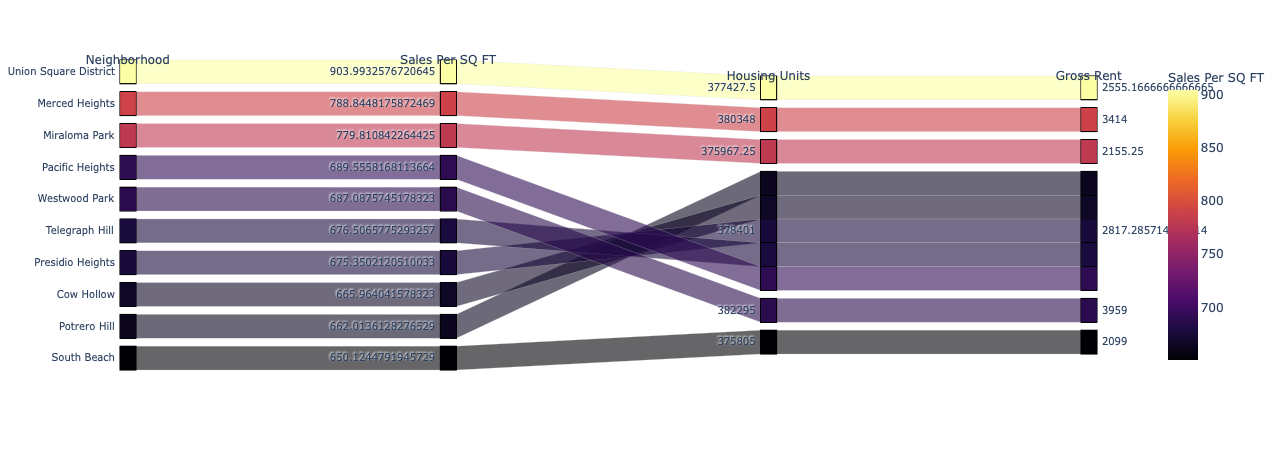

In [110]:
# Parallel Categories Plot
parallel_categories = housing_data_index.sort_values(["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"])

px.parallel_categories(
    housing_data_index.iloc[:10],
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Sales Per SQ FT",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent"
        
    },
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [111]:
# Load neighborhoods coordinates data
file_path = Path("neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [112]:
# Calculate the mean values for each neighborhood(Sort Values and Reset Index)
housing_data_index = housing_data_index.sort_values('neighborhood').reset_index()
housing_data_index.head()

,index,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,60,Alamo Square,366.020712,378401.0,2817.285714
1,58,Anza Vista,373.382198,379050.0,3031.833333
2,70,Bayview,204.588623,376454.0,2318.400000
3,15,Bayview Heights,590.792839,382295.0,3739.000000
4,18,Bernal Heights,576.746488,379374.5,3080.333333


In [113]:
# Join the average values with the neighborhood locations'
total_db = pd.concat([df_neighborhood_locations, housing_data_index], join='inner', axis=1)
total_db.head()

,Neighborhood,Lat,Lon,index,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,60,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,58,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,70,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,15,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,18,Bernal Heights,576.746488,379374.5,3080.333333


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

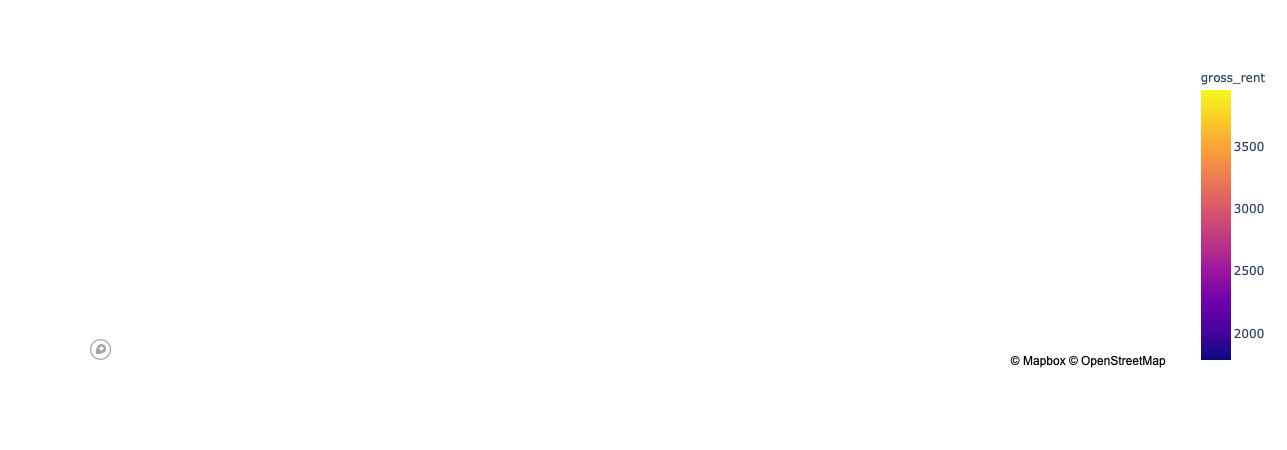

In [114]:
# Create a scatter mapbox to analyze neighborhood info
neighborhood_map = px.scatter_mapbox(
    total_db,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    zoom=4
)

# Display the map
neighborhood_map.show()

# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [115]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [116]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX")

# Import Data

In [117]:
# Import the CSVs to Pandas DataFrames
file_path = Path("sfo_neighborhoods_census_data.csv")
housing_data = pd.read_csv(file_path, index_col="year")

file_path = Path("neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [118]:
# Define Panel Visualization Functions
def get_housing_units_per_year():
    """Housing Units Per Year."""
    housing_units_per_year = housing_data_mean.hvplot.bar(x="year", y="housing_units", rot=90).opts(
    yformatter="%.0f", title="Housing Units in San Fransisco from 2010 to 2016",
    ylim=(housing_min_price - housing_std, housing_max_price + housing_std)
    )
    return housing_units_per_year


def get_average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    average_gross_rent = housing_data_aver_yr['gross_rent'].hvplot(title='Average Gross Rent in San Fransisco')
    return average_gross_rent


def get_average_sales_price():
    """Average Sales Price Per Year."""
    average_sales_price = housing_data_aver_yr['sale_price_sqr_foot'].hvplot(title='Average Sale Price Per Year in San Fransisco')
    return average_sales_price


def get_average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    average_price_by_neighborhood = average_price_by_nb.hvplot.line('year', 'sale_price_sqr_foot', groupby='neighborhood')
    return average_price_by_neighborhood
  


def get_top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    top_most_expensive_neighborhoods = housing_data_high['sale_price_sqr_foot'].iloc[0:10].hvplot(kind='bar').opts(frame_width=1000, frame_height=500, xlabel='Neighborhoods',  
    ylabel='Sales Per SQ FT', title='Top 10 Most Expensive Neighborhoods in San Fransisco', ylim=(500, 1000))
    return top_most_expensive_neighborhoods



def get_parallel_coordinates():
    """Parallel Coordinates Plot."""
    parallel_coordinates = px.parallel_coordinates(housing_data_high.iloc[:10], color='sale_price_sqr_foot')
    return parallel_coordinates
   


def get_parallel_categories():
    """Parallel Categories Plot."""
    parallel_categories = housing_data_index.sort_values(["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"])

    plot = px.parallel_categories(
    housing_data_index.iloc[:10],
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Sales Per SQ FT",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent"
        
    },
    )
    return plot

     
    
def get_neighborhood_map():
    """Neighborhood Map"""
    neighborhood_map = px.scatter_mapbox(
    total_db,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    zoom=4
    )
    return neighborhood_map
 

In [119]:
#Organize dashboard into Columns
units_numbers_and_top_ten = pn.Column(
    "## Housing Units Per Year & Most Expensive Neighborhoods", get_housing_units_per_year(), get_top_most_expensive_neighborhoods(),
)

average_rents_and_sales = pn.Column(
    "## Average Gross Rent & Sales Price",
    get_average_gross_rent(),
    get_average_sales_price(),
)

parallel = pn.Column(
    "## Parallel Categories & Coordinates",
   get_parallel_coordinates(),
   get_parallel_categories(), 
)

neighborhood_map_prices = pn.Column(
    "## Average Price By Neighborhood & Map",
   get_average_price_by_neighborhood(),
   get_neighborhood_map(),
)

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [120]:
#Organize Tabs for Dashboard
tabs = pn.Tabs(
    ('Average Gross Rent & Sales Price', average_rents_and_sales),
    ('Housing Units Per Year & Most Expensive Neighborhoods', units_numbers_and_top_ten),
    ('Parallel Cordinates & Categories Chart', parallel),
    ('Neighborhoods With Price Map', neighborhood_map_prices)
)
panel = pn.Column('San Fransisco Real Estate Evaluation', tabs)

## Serve the Panel Dashboard

In [121]:
panel.servable()

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] HoloViews(Curve)
            [2] HoloViews(Curve)
        [1] Column
            [0] Markdown(str)
            [1] HoloViews(Bars)
            [2] HoloViews(Bars)
        [2] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
            [2] Plotly(Figure)
        [3] Column
            [0] Markdown(str)
            [1] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
            [2] Plotly(Figure)